In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import ast
import os
import random
import shutil
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import glob
import collections
from tqdm import tqdm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/1683inst_339imgs.csv')
df

,filename,class,x_center,y_center,bbox_height,bbox_width,image_height,image_width
0,1a.jpeg,Acne scars,0.588000,0.473013,0.004751,0.008451,1334.0,750.0
1,1a.jpeg,Acne scars,0.606667,0.473763,0.009685,0.017227,1334.0,750.0
2,1a.jpeg,Acne scars,0.544000,0.496252,0.014993,0.026667,1334.0,750.0
3,b1.jpeg,Acne scars,0.446667,0.304348,0.017991,0.032000,1334.0,750.0
4,b1.jpeg,Frackels,0.477333,0.213643,0.008996,0.016000,1334.0,750.0
...,...,...,...,...,...,...,...,...
1678,za2.JPG,Acne,0.431548,0.560516,0.035218,0.046958,4032.0,3024.0
1679,za2.JPG,Acne scars,0.466270,0.586062,0.057540,0.076720,4032.0,3024.0
1680,za2.JPG,Acne scars,0.491733,0.503968,0.043155,0.057540,4032.0,3024.0
1681,za2.JPG,Frackels,0.547950,0.618552,0.027461,0.036614,4032.0,3024.0


In [ ]:
df_unique = df.drop_duplicates(subset=['filename'], keep='first')
counts = df_unique.groupby(['image_height', 'image_width']).size().reset_index(name='count')
counts

,image_height,image_width,count
0,1024.0,768.0,9
1,1200.0,1600.0,2
2,1250.0,1600.0,1
3,1280.0,720.0,3
4,1280.0,813.0,1
5,1280.0,958.0,6
6,1280.0,960.0,7
7,1334.0,750.0,4
8,1486.0,1600.0,1
9,1490.0,1600.0,1


In [ ]:
df[df['class']=='Dark Circles']['filename'].nunique()

45

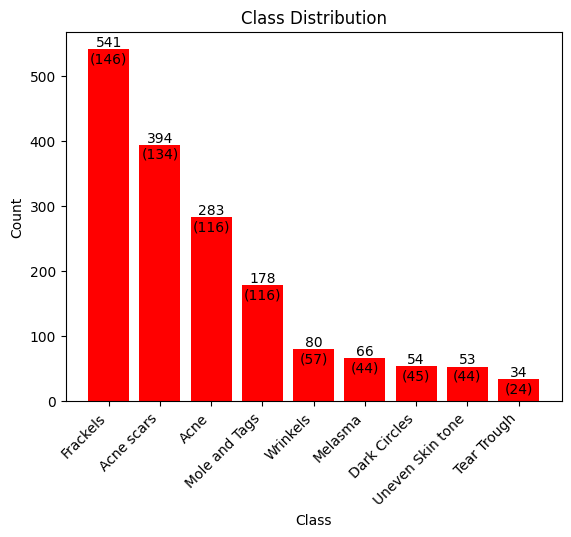

In [ ]:
class_distribution = df['class'].value_counts()
num_unique_files = df.groupby('class')['filename'].nunique()

plt.bar(class_distribution.index, class_distribution.values,color='r')

for i, value in enumerate(class_distribution.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
    plt.text(i, value-25, f"({num_unique_files[class_distribution.index[i]]})", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()

In [ ]:
def count_class_instances(df, filename):
  data = {}
  df = df[df["filename"] == filename]

  #Counting class occurannce per image
  class_count = df['class'].value_counts()

  data['filename'] = filename
  for attr, count in class_count.items():
    data[attr] = count

  return data

In [ ]:
all_files_list = df['filename'].unique()
class_count = []

for filename in all_files_list:
  count_dict = count_class_instances(df, filename)
  class_count.append(count_dict)

In [ ]:
class_count[:10]

[{'filename': '1a.jpeg', 'Acne scars': 3},
 {'filename': 'b1.jpeg', 'Frackels': 9, 'Acne scars': 1, 'Wrinkels': 1},
 {'filename': 'b2.jpeg', 'Frackels': 4, 'Mole and Tags': 1},
 {'filename': 'b3.jpeg', 'Frackels': 5, 'Acne scars': 2},
 {'filename': 'c1.jpeg',
  'Acne scars': 10,
  'Acne': 8,
  'Wrinkels': 4,
  'Frackels': 1},
 {'filename': 'c2.jpeg', 'Acne': 13, 'Acne scars': 12},
 {'filename': 'd1.jpeg', 'Uneven Skin tone': 2},
 {'filename': 'd2.jpeg', 'Uneven Skin tone': 2},
 {'filename': 'd3.jpeg', 'Frackels': 2, 'Uneven Skin tone': 1},
 {'filename': 'e1.jpeg', 'Frackels': 12, 'Acne': 1}]

In [ ]:
def find_pairs_trips(df,person_id):
  singles = []
  pairs = []
  trips = []

  all_files_list = df['filename'].unique()

  # Create a dictionary to store the occurrences of each name
  name_occurrences = {}

  for filename in all_files_list:
      # Extract the name by removing the digit before the '.'
      name = filename.split('.')[0][:-1]

      # Increment the occurrence count for the name
      name_occurrences[name] = name_occurrences.get(name, 0) + 1

  # Separate the elements into singles, pairs and trips based on occurrence count
  if not person_id:
    for filename in all_files_list:
        name = filename.split('.')[0][:-1]

        if name_occurrences[name] == 1:
            singles.append(filename)
        elif name_occurrences[name] == 2:
            pairs.append(filename)
        else:
            trips.append(filename)


  if person_id:
    for filename in all_files_list:
        name = filename.split('.')[0][:-1]

        if name_occurrences[name] == 1:
            singles.append(name)
        elif name_occurrences[name] == 2:
            pairs.append(name)
        else:
            trips.append(name)

  return singles, pairs, trips

In [ ]:
singles, pairs, trips= find_pairs_trips(df,person_id=False)
print("Singles:", len(singles), singles)
print("Pairs:", len(pairs), pairs)
print("Trips:", len(trips), trips)

Singles: 12 ['1a.jpeg', 'aa1.jpeg', 'bb2.jpeg', 'cc2.jpeg', 'ee1.jpeg', 'ii1.jpeg', 'tt1.jpeg', 'ccccc3.JPG', 'iiiii1.JPG', 'fa2.JPG', 'na1.JPG', 'oa1.JPG']
Pairs: 60 ['f1.jpeg', 'f2.jpeg', 'l1.jpeg', 'l2.jpeg', 't1.jpeg', 't2.jpeg', 'y1.jpeg', 'y2.jpeg', 'ff1.jpeg', 'ff2.jpeg', 'gg1.jpeg', 'gg2.jpeg', 'jj1.jpeg', 'jj2.jpeg', 'kk1.jpeg', 'kk2.jpeg', 'll1.jpeg', 'll2.jpeg', 'nn1.jpeg', 'nn2.jpeg', 'pp1.jpeg', 'pp2.jpeg', 'qq2.jpeg', 'qq3.jpeg', 'uu1.jpeg', 'uu2.jpeg', 'kkk1.jpg', 'kkk2.jpg', 'ttt1.jpg', 'ttt2.jpg', 'hhhh2.jpg', 'hhhh3.jpg', 'nnnn1.jpg', 'nnnn2.jpg', 'eeeee3.JPG', 'eeeee5.JPG', 'fffff1.JPG', 'fffff2.JPG', 'hhhhh1.JPG', 'hhhhh3.JPG', 'ca1.JPG', 'ca2.JPG', 'ha1.JPG', 'ha2.JPG', 'ja2.JPG', 'ja3.JPG', 'la1.JPG', 'la2.JPG', 'pa1.JPG', 'pa3.JPG', 'qa1.JPG', 'qa2.JPG', 'va1.JPG', 'va3.JPG', 'wa1.JPG', 'wa2.JPG', 'xa1.JPG', 'xa2.JPG', 'ya1.JPG', 'ya2.JPG']
Trips: 267 ['b1.jpeg', 'b2.jpeg', 'b3.jpeg', 'c1.jpeg', 'c2.jpeg', 'd1.jpeg', 'd2.jpeg', 'd3.jpeg', 'e1.jpeg', 'e2.jpeg', 'e

In [ ]:
singles, pairs, trips = find_pairs_trips(df,person_id=True)
print("Singles:", len(singles), singles)
print("Pairs:", len([*set(pairs)]), sorted([*set(pairs)]))
print("Trips:", len([*set(trips)]), sorted([*set(trips)]))

Singles: 12 ['1', 'aa', 'bb', 'cc', 'ee', 'ii', 'tt', 'ccccc', 'iiiii', 'fa', 'na', 'oa']
Pairs: 30 ['ca', 'eeeee', 'f', 'ff', 'fffff', 'gg', 'ha', 'hhhh', 'hhhhh', 'ja', 'jj', 'kk', 'kkk', 'l', 'la', 'll', 'nn', 'nnnn', 'pa', 'pp', 'qa', 'qq', 't', 'ttt', 'uu', 'va', 'wa', 'xa', 'y', 'ya']
Trips: 85 ['IMG_740', 'IMG_741', 'IMG_742', 'a', 'aaa', 'aaaa', 'aaaaa', 'b', 'ba', 'bbb', 'bbbb', 'c', 'ccc', 'cccc', 'd', 'da', 'dd', 'ddd', 'dddd', 'ddddd', 'e', 'ea', 'eee', 'eeee', 'ffff', 'g', 'ga', 'ggg', 'gggg', 'h', 'hh', 'hhh', 'i', 'ia', 'iii', 'iiii', 'j', 'jjj', 'jjjj', 'k', 'ka', 'kkkk', 'lll', 'llll', 'm', 'ma', 'mm', 'mmm', 'mmmm', 'n', 'nnn', 'o', 'oo', 'ooo', 'oooo', 'p', 'ppp', 'pppp', 'q', 'qqq', 'r', 'ra', 'rr', 'rrr', 's', 'sa', 'ss', 'sss', 'u', 'uuu', 'v', 'vv', 'vvv', 'w', 'ww', 'www', 'x', 'xx', 'xxx', 'yy', 'yyy', 'z', 'za', 'zz', 'zzz']


In [ ]:
def pairs_trips_class(class_count,singles,pairs,trips):
    singles_count = []
    pairs_count = []
    trips_count = []

    for dict_ in class_count:
      class_dict = {}
      for key, value in dict_.items():

        if key == 'filename':
          person_id = value.split('.')[0][:-1]      #aaa, b, dd, e

          if person_id in singles:
            singles_count.append(dict_)

          elif person_id in pairs:
            pairs_count.append(dict_)

          else:
            trips_count.append(dict_)

    return singles_count, pairs_count, trips_count

In [ ]:
singles_count, pairs_count, trips_count = pairs_trips_class(class_count,singles,pairs,trips)
print("singles:", len(singles_count), singles_count)
print("pairs:", len(pairs_count), pairs_count)
print("trips:", len(trips_count), trips_count)

singles: 12 [{'filename': '1a.jpeg', 'Acne scars': 3}, {'filename': 'aa1.jpeg', 'Acne scars': 6, 'Frackels': 3}, {'filename': 'bb2.jpeg', 'Frackels': 3, 'Mole and Tags': 1, 'Acne': 1}, {'filename': 'cc2.jpeg', 'Acne': 3, 'Frackels': 3, 'Mole and Tags': 3, 'Acne scars': 1, 'Uneven Skin tone': 1}, {'filename': 'ee1.jpeg', 'Mole and Tags': 5, 'Acne scars': 4, 'Acne': 2, 'Frackels': 1}, {'filename': 'ii1.jpeg', 'Frackels': 3, 'Acne': 2}, {'filename': 'tt1.jpeg', 'Frackels': 8, 'Acne': 1}, {'filename': 'ccccc3.JPG', 'Acne scars': 1, 'Mole and Tags': 1}, {'filename': 'iiiii1.JPG', 'Melasma': 3}, {'filename': 'fa2.JPG', 'Uneven Skin tone': 1}, {'filename': 'na1.JPG', 'Mole and Tags': 4}, {'filename': 'oa1.JPG', 'Dark Circles': 2}]
pairs: 60 [{'filename': 'f1.jpeg', 'Acne scars': 4, 'Acne': 2, 'Mole and Tags': 1}, {'filename': 'f2.jpeg', 'Acne scars': 6, 'Frackels': 3, 'Mole and Tags': 1}, {'filename': 'l1.jpeg', 'Acne scars': 6, 'Frackels': 5, 'Acne': 4, 'Uneven Skin tone': 2}, {'filename': '

In [ ]:
def group_by_person(count_list):
  grouped_data = {}

  for dict_ in count_list:
      filename = dict_['filename']
      person_id = filename.split('.')[0][:-1]

      if person_id not in grouped_data:
          grouped_data[person_id] = {}

      for key, value in dict_.items():
          if key != 'filename':
              grouped_data[person_id][key] = grouped_data[person_id].get(key, 0) + value

  # Convert the grouped data back to a list of dictionaries
  result = [{'person_id': k, **v} for k, v in grouped_data.items()]

  return result

In [ ]:
single_person = group_by_person(singles_count)
pairs_person = group_by_person(pairs_count)
trips_person = group_by_person(trips_count)

print("singles:", len(single_person), single_person)
print("pairs:", len(pairs_person), pairs_person)
print("trips:", len(trips_person), trips_person)

singles: 12 [{'person_id': '1', 'Acne scars': 3}, {'person_id': 'aa', 'Acne scars': 6, 'Frackels': 3}, {'person_id': 'bb', 'Frackels': 3, 'Mole and Tags': 1, 'Acne': 1}, {'person_id': 'cc', 'Acne': 3, 'Frackels': 3, 'Mole and Tags': 3, 'Acne scars': 1, 'Uneven Skin tone': 1}, {'person_id': 'ee', 'Mole and Tags': 5, 'Acne scars': 4, 'Acne': 2, 'Frackels': 1}, {'person_id': 'ii', 'Frackels': 3, 'Acne': 2}, {'person_id': 'tt', 'Frackels': 8, 'Acne': 1}, {'person_id': 'ccccc', 'Acne scars': 1, 'Mole and Tags': 1}, {'person_id': 'iiiii', 'Melasma': 3}, {'person_id': 'fa', 'Uneven Skin tone': 1}, {'person_id': 'na', 'Mole and Tags': 4}, {'person_id': 'oa', 'Dark Circles': 2}]
pairs: 30 [{'person_id': 'f', 'Acne scars': 10, 'Acne': 2, 'Mole and Tags': 2, 'Frackels': 3}, {'person_id': 'l', 'Acne scars': 7, 'Frackels': 6, 'Acne': 18, 'Uneven Skin tone': 3, 'Mole and Tags': 1}, {'person_id': 't', 'Frackels': 14, 'Mole and Tags': 1, 'Uneven Skin tone': 2}, {'person_id': 'y', 'Acne scars': 8, 'Fra

#<h1>Plotting

In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import cv2
import os
import ast
import random
import shutil
from PIL import Image
import glob
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.patches as patches

In [ ]:
def load_images_from_folder(folder_path):
    img_dict = {}
    filenames = sorted(os.listdir(folder_path))

    for filename in filenames:
        image_path = os.path.join(folder_path, filename)
        img_dict[filename] = image_path

    return img_dict

In [ ]:
def extract_annots_df(df, file_name):
    anno = []

    df = df[df["filename"] == file_name]

    for index, row in df.iterrows():
        data = {}
        data["img_h"] = row['image_height']
        data["img_w"] = row['image_width']
        data["bbox_h"] = row['bbox_height']
        data["bbox_w"] = row['bbox_width']

        #Converting Center coordinates to bottom left and right coordinates and doubling the width & height JUST for PLOTTING
        data["cx"] = row['x_center'] - (row['bbox_width'] / 2)
        data["cy"] = row['y_center'] - (row['bbox_height'] / 2)

        data["disease"] = row['class']
        data["color"] = assign_color(label=row['class'])

        anno.append(data)
    return anno

In [ ]:
def plot(image_path, annots, key):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    ax[0].imshow(img)
    ax[0].axis('off')
    for i in annots:
        x, y, h, w = i["cx"],i["cy"], i["bbox_h"], i["bbox_w"]
        img_w, img_h, color = i['img_w'], i['img_h'], i["color"]

        if color:
          #Multipying with image width and height to DENORMALISE jut for plotting.
          rect = patches.Rectangle((x*img_w, y*img_h), w*img_w, h*img_h, linewidth=0.5, edgecolor=color, facecolor='none')
          ax[0].add_artist(rect)

    key = Image.open(key)
    ax[1].imshow(key)
    ax[1].axis('off')

    plt.show()

In [ ]:
def assign_color(label):
    if label == "Frackels":
        return "red"
    elif label == "Acne":
        return "green"
    elif label == "Acne scars":
        return "blue"
    elif label == "Melasma":
        return "yellow"
    elif label == "Uneven Skin tone":
        return "white"
    elif label == "Mole and Tags":
        return "purple"
    elif label == "Wrinkels":
        return "cyan"
    elif label == "Dark Circles":
        return "gray"
    elif label == "Tear Trough":
        return "magenta"
    else:
        return "black"

In [ ]:
images_dir = '/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12'

In [ ]:
key = '/content/drive/MyDrive/Colab_Skin_Disease/Drawio keys/All_diseases_key.drawio.png'

In [ ]:
images = load_images_from_folder(images_dir)

In [ ]:
# for name, path in images.items():
#     annots = extract_annots_df(df,name)
#     plot(image_path=path, annots=annots,key=key)
#     print(name)

# <h1> Only including specific classes

In [ ]:
attr = ['Frackels', 'Acne scars', 'Acne','Mole and Tags']
# # attr = ['Frackels']

df = df[df['class'].isin(attr)]
print('Class:',df['class'].unique())
print('Total Files:',df.filename.nunique())
print('Total Instances:',df.shape[0])

Class: []
Total Files: 0
Total Instances: 0


In [ ]:
# Renaming all class 'Others' except 'Frackels', 'Acne scars', 'Acne'
df['class'] = df['class'].replace(['Mole and Tags','Frackels'], 'Frackels')
df['class'] = df['class'].replace(['Acne scars', 'Acne'], 'Acne')

In [ ]:
shutil.rmtree('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data')
# shutil.rmtree('/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs')
# shutil.rmtree('/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs')

In [ ]:
# os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs')
# os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs')

os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data')

os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train')
os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/images')
os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/labels')

os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val')
os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/images')
os.mkdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/labels')

# Making into pairs and triplets

In [ ]:
#Counting class instances per image
all_files_list = df['filename'].unique()
class_count = []

for filename in all_files_list:
  count_dict = count_class_instances(df, filename)
  class_count.append(count_dict)
class_count[:10]

[{'filename': '1a.jpeg', 'Acne': 3},
 {'filename': 'b1.jpeg', 'Frackels': 9, 'Acne': 1},
 {'filename': 'b2.jpeg', 'Frackels': 5},
 {'filename': 'b3.jpeg', 'Frackels': 5, 'Acne': 2},
 {'filename': 'c1.jpeg', 'Acne': 18, 'Frackels': 1},
 {'filename': 'c2.jpeg', 'Acne': 25},
 {'filename': 'd3.jpeg', 'Frackels': 2},
 {'filename': 'e1.jpeg', 'Frackels': 12, 'Acne': 1},
 {'filename': 'e2.jpeg', 'Frackels': 9, 'Acne': 2},
 {'filename': 'e3.jpeg', 'Frackels': 6, 'Acne': 1}]

In [ ]:
singles, pairs, trips = find_pairs_trips(df,person_id=True)
print("Singles:", len(singles), singles)
print("Pairs:", len([*set(pairs)]), sorted([*set(pairs)]))
print("Trips:", len([*set(trips)]), sorted([*set(trips)]))

Singles: 18 ['1', 'd', 'aa', 'bb', 'cc', 'ee', 'ii', 'tt', 'xx', 'ddd', 'yyy', 'hhhh', 'ccccc', 'ddddd', 'eeeee', 'ka', 'na', 'sa']
Pairs: 42 ['IMG_740', 'aaaa', 'bbb', 'c', 'ca', 'ccc', 'cccc', 'f', 'ff', 'ffff', 'fffff', 'ga', 'gg', 'ha', 'hhhhh', 'ia', 'jj', 'kk', 'kkk', 'l', 'la', 'll', 'llll', 'nn', 'nnnn', 'o', 'ooo', 'pa', 'pp', 'qa', 'qq', 't', 'ttt', 'uu', 'va', 'vv', 'wa', 'xa', 'y', 'ya', 'za', 'zz']
Trips: 59 ['IMG_741', 'a', 'aaa', 'aaaaa', 'b', 'ba', 'bbbb', 'da', 'dd', 'dddd', 'e', 'ea', 'eee', 'eeee', 'g', 'ggg', 'gggg', 'h', 'hh', 'hhh', 'i', 'iii', 'iiii', 'j', 'jjj', 'jjjj', 'k', 'kkkk', 'lll', 'm', 'ma', 'mm', 'mmm', 'mmmm', 'n', 'nnn', 'oo', 'oooo', 'p', 'ppp', 'pppp', 'q', 'qqq', 'r', 'ra', 'rr', 'rrr', 's', 'ss', 'sss', 'u', 'uuu', 'v', 'w', 'ww', 'www', 'x', 'z', 'zzz']


In [ ]:
singles_count, pairs_count, trips_count = pairs_trips_class(class_count,singles,pairs,trips)
print("singles:", len(singles_count), singles_count)
print("pairs:", len(pairs_count), pairs_count)
print("trips:", len(trips_count), trips_count)

singles: 18 [{'filename': '1a.jpeg', 'Acne': 3}, {'filename': 'd3.jpeg', 'Frackels': 2}, {'filename': 'aa1.jpeg', 'Acne': 6, 'Frackels': 3}, {'filename': 'bb2.jpeg', 'Frackels': 4, 'Acne': 1}, {'filename': 'cc2.jpeg', 'Frackels': 6, 'Acne': 4}, {'filename': 'ee1.jpeg', 'Acne': 6, 'Frackels': 6}, {'filename': 'ii1.jpeg', 'Frackels': 3, 'Acne': 2}, {'filename': 'tt1.jpeg', 'Frackels': 8, 'Acne': 1}, {'filename': 'xx1.jpg', 'Acne': 2}, {'filename': 'ddd2.jpg', 'Acne': 1}, {'filename': 'yyy2.jpg', 'Frackels': 1}, {'filename': 'hhhh2.jpg', 'Acne': 1}, {'filename': 'ccccc3.JPG', 'Acne': 1, 'Frackels': 1}, {'filename': 'ddddd1.JPG', 'Acne': 1}, {'filename': 'eeeee3.JPG', 'Frackels': 2}, {'filename': 'ka1.JPG', 'Frackels': 2}, {'filename': 'na1.JPG', 'Frackels': 4}, {'filename': 'sa2.JPG', 'Acne': 1}]
pairs: 84 [{'filename': 'c1.jpeg', 'Acne': 18, 'Frackels': 1}, {'filename': 'c2.jpeg', 'Acne': 25}, {'filename': 'f1.jpeg', 'Acne': 6, 'Frackels': 1}, {'filename': 'f2.jpeg', 'Acne': 6, 'Frackels

In [ ]:
single_person = group_by_person(singles_count)
pairs_person = group_by_person(pairs_count)
trips_person = group_by_person(trips_count)

print("singles:", len(single_person), single_person)
print("pairs:", len(pairs_person), pairs_person)
print("trips:", len(trips_person), trips_person)

singles: 18 [{'person_id': '1', 'Acne': 3}, {'person_id': 'd', 'Frackels': 2}, {'person_id': 'aa', 'Acne': 6, 'Frackels': 3}, {'person_id': 'bb', 'Frackels': 4, 'Acne': 1}, {'person_id': 'cc', 'Frackels': 6, 'Acne': 4}, {'person_id': 'ee', 'Acne': 6, 'Frackels': 6}, {'person_id': 'ii', 'Frackels': 3, 'Acne': 2}, {'person_id': 'tt', 'Frackels': 8, 'Acne': 1}, {'person_id': 'xx', 'Acne': 2}, {'person_id': 'ddd', 'Acne': 1}, {'person_id': 'yyy', 'Frackels': 1}, {'person_id': 'hhhh', 'Acne': 1}, {'person_id': 'ccccc', 'Acne': 1, 'Frackels': 1}, {'person_id': 'ddddd', 'Acne': 1}, {'person_id': 'eeeee', 'Frackels': 2}, {'person_id': 'ka', 'Frackels': 2}, {'person_id': 'na', 'Frackels': 4}, {'person_id': 'sa', 'Acne': 1}]
pairs: 42 [{'person_id': 'c', 'Acne': 43, 'Frackels': 1}, {'person_id': 'f', 'Acne': 12, 'Frackels': 5}, {'person_id': 'l', 'Acne': 25, 'Frackels': 7}, {'person_id': 'o', 'Frackels': 10, 'Acne': 3}, {'person_id': 't', 'Frackels': 15}, {'person_id': 'y', 'Acne': 10, 'Frackels

# ---



In [ ]:
df['filename'].nunique()

282

In [ ]:
selected_files = df['filename'].unique().tolist()

Splitting after Augmentation

# ========== OR ==========

In [ ]:
aug_df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/AUGMENTED.csv')
aug_df

,filename,class,x_center,y_center,bbox_height,bbox_width,image_height,image_width
0,aa1_Orignal.jpeg,Frackels,0.44250,0.647500,0.015000,0.020000,1600.0,1200.0
1,aa1_Orignal.jpeg,Frackels,0.47000,0.604375,0.010000,0.013333,1600.0,1200.0
2,aa1_Orignal.jpeg,Frackels,0.55250,0.586875,0.007500,0.010000,1600.0,1200.0
3,aa1_CLAHE.jpeg,Frackels,0.44250,0.647500,0.015000,0.020000,1600.0,1200.0
4,aa1_CLAHE.jpeg,Frackels,0.47000,0.604375,0.010000,0.013333,1600.0,1200.0
...,...,...,...,...,...,...,...,...
5405,za2_saturtion_brightness.JPG,Frackels,0.54795,0.618552,0.027461,0.036614,4032.0,3024.0
5406,za2_sharpen_brighten.JPG,Frackels,0.54795,0.618552,0.027461,0.036614,4032.0,3024.0
5407,za2_median_blur.JPG,Frackels,0.54795,0.618552,0.027461,0.036614,4032.0,3024.0
5408,za2_multi_noise_brighten.JPG,Frackels,0.54795,0.618552,0.027461,0.036614,4032.0,3024.0


In [ ]:
selected_files = aug_df['filename'].unique().tolist()
aug_df.filename.nunique()

1460

In [ ]:
1460-300

1160

In [ ]:
import os

# folder path
dir_path = '/content/drive/MyDrive/Colab_Skin_Disease/Augmented/images'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1460


In [ ]:
source_folder = "/content/drive/MyDrive/Colab_Skin_Disease/Augmented/images"
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs"
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs"

# Get the list of files in the source folder
all_files = sorted(os.listdir(source_folder))

# Randomly choose files for Traning>>>>
train_files = random.sample(all_files, 1150)
val_files = np.setdiff1d(all_files, train_files ).tolist()
print(len(train_files))
print(len(val_files))

# Copy the chosen files to the Traning folder
for file_name in train_files:
    t_source_file_path = os.path.join(source_folder, file_name)
    t_destination_file_path = os.path.join(train_folder, file_name)
    shutil.copyfile(t_source_file_path, t_destination_file_path)

# Copy the rest of the files to the Validation folder
for file_name in val_files:
    v_source_file_path = os.path.join(source_folder, file_name)
    v_destination_file_path = os.path.join(val_folder, file_name)
    # print(v_source_file_path, v_destination_file_path)
    shutil.copyfile(v_source_file_path, v_destination_file_path)

1150
310


In [ ]:
train_df = aug_df[aug_df['filename'].isin(train_files)]
val_df = aug_df[aug_df['filename'].isin(val_files)]

print('>>>\nTraining instances:',train_df.shape[0])
print('Training files:',train_df.filename.nunique())
print('\nValidation instances:',val_df.shape[0])
print('Validation files:',val_df.filename.nunique())

>>>
Training instances: 4182
Training files: 1150

Validation instances: 1228
Validation files: 310


For manually spliting...for ensembling with rcnn

# ========== OR ==========

In [ ]:
#@title
val_files = ['p2.jpeg', 'q2.jpeg', 'qq2.jpeg', 'qq3.jpeg', 'r2.jpeg',
       'rr1.jpeg', 'rr2.jpeg', 'rr3.jpeg', 's2.jpeg', 'ss1.jpeg',
       'sss2.jpg', 'v1.jpeg', 'ww2.jpg', 'ww3.jpg', 'x1.jpeg', 'x2.jpeg',
       'xx1.jpg', 'y2.jpeg']

In [ ]:
#@title
source_folder = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs"
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs"

val_files = val_files
train_files = np.setdiff1d(selected_files, val_files ).tolist()

# Copy to the train folder
for file_name in train_files:
    t_source_file_path = os.path.join(source_folder, file_name)
    t_destination_file_path = os.path.join(train_folder, file_name)
    shutil.copyfile(t_source_file_path, t_destination_file_path)

# Copy to the val folder
for file_name in val_files:
    v_source_file_path = os.path.join(source_folder, file_name)
    v_destination_file_path = os.path.join(val_folder, file_name)
    # print(v_source_file_path, v_destination_file_path)
    shutil.copyfile(v_source_file_path, v_destination_file_path)

**Stratifiing** for multi class

# ========== OR ==========

In [ ]:
#@title
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<STRTIFYING>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn.model_selection import train_test_split

# # Add a column indicating the list name for each row
# singles_with_list = [{'list': 'singles', **row} for row in single_person]
# pairs_with_list = [{'list': 'pairs', **row} for row in pairs_person]
# trips_with_list = [{'list': 'trips', **row} for row in trips_person]

# # Combine all three lists
# combined_list = singles_with_list + pairs_with_list + trips_with_list

# # Convert combined list to DataFrame
# t_df = pd.DataFrame(combined_list)

In [ ]:
# t_df = t_df.fillna(0)

In [ ]:
# t_df

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.25, stratify=df[["class"]])

In [ ]:
print(df_train['class'].unique())
print(df_train.filename.nunique())

print(df_val['class'].unique())
print(df_val.filename.nunique())

['Frackels' 'Acne scars' 'Acne']
234
['Acne' 'Acne scars' 'Frackels']
145


In [ ]:
# validation_files = []

# for filename in selected_files:
#   person_id = filename.split('.')[0][:-1]

#   for index, row in df_val.iterrows():
#     if row['person_id'] == person_id:
#         validation_files.append(filename)
#   # print(row['person_id'],person_id)
#   # break

In [ ]:
# len(validation_files)

In [ ]:
train_files = df_train.filename.unique()
val_files = df_val.filename.unique()

In [ ]:
#@title
source_folder = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs"
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs"

# val_files = validation_files
# train_files = np.setdiff1d(selected_files, validation_files ).tolist()

# Copy to the train folder
for file_name in tqdm(train_files):
    t_source_file_path = os.path.join(source_folder, file_name)
    t_destination_file_path = os.path.join(train_folder, file_name)
    shutil.copyfile(t_source_file_path, t_destination_file_path)

# Copy to the val folder
for file_name in tqdm(val_files):
    v_source_file_path = os.path.join(source_folder, file_name)
    v_destination_file_path = os.path.join(val_folder, file_name)
    # print(v_source_file_path, v_destination_file_path)
    shutil.copyfile(v_source_file_path, v_destination_file_path)

100%|██████████| 145/145 [00:02<00:00, 54.69it/s]


slecting images for train and val...  **Stratified based on no. of singles, pairs and trips**

# ========== OR ==========

In [ ]:
validation_examples = 75

s_count = len(single_person)
p_count = len(pairs_person)
t_count = len(trips_person)

# Calculate the total count
total_count = s_count + p_count + t_count

# Calculate the percentage
singles_percentage = (s_count / total_count) * 100
pairs_percentage = (p_count / total_count) * 100
trips_percentage = (t_count / total_count) * 100

# Calculate the new counts based on the desired final number
total_percentage = singles_percentage + pairs_percentage + trips_percentage
singles_examples = int((singles_percentage / total_percentage) * validation_examples)
pairs_examples = int((pairs_percentage / total_percentage) * validation_examples)
trips_examples = validation_examples - singles_examples - pairs_examples

print("Singles Percentage:", singles_percentage)
print("Pairs Percentage:", pairs_percentage)
print("Trips Percentage:", trips_percentage)
print("\nNew Singles Count:", singles_examples, "\t", singles_examples, "People")
print("New Pairs Count:", pairs_examples, "\t", pairs_examples/2, "People")
print("New Trips Count:", trips_examples, "\t", trips_examples/3, "People")

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
single_files = random.sample(single_person, singles_examples)
pairs_files = random.sample(pairs_person, (pairs_examples//2))
trips_files = random.sample(trips_person, (trips_examples//3))
temp_list = trips_files + pairs_files + single_files
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

val_files = []
for filename in selected_files:
  person_id = filename.split('.')[0][:-1]

  for d in temp_list:
    if d['person_id'] == person_id:
        val_files.append(filename)

train_files = np.setdiff1d(selected_files, val_files ).tolist()
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

train_df = df[df['filename'].isin(train_files)]
val_df = df[df['filename'].isin(val_files)]

print('\nTraining instances:',train_df.shape[0])
print('Training files:',train_df.filename.nunique())
print('\nValidation instances:',val_df.shape[0])
print('Validation files:',val_df.filename.nunique())

Singles Percentage: 15.126050420168067
Pairs Percentage: 35.294117647058826
Trips Percentage: 49.57983193277311

New Singles Count: 11 	 11 People
New Pairs Count: 26 	 13.0 People
New Trips Count: 38 	 12.666666666666666 People

Training instances: 1074
Training files: 209

Validation instances: 322
Validation files: 73


In [ ]:
source_folder = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs"
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs"

# Copy to the train folder
for file_name in tqdm(train_files):
    t_source_file_path = os.path.join(source_folder, file_name)
    t_destination_file_path = os.path.join(train_folder, file_name)
    # print(t_source_file_path, t_destination_file_path)
    shutil.copyfile(t_source_file_path, t_destination_file_path)

# Copy to the val folder
for file_name in tqdm(val_files):
    v_source_file_path = os.path.join(source_folder, file_name)
    v_destination_file_path = os.path.join(val_folder, file_name)
    # print(v_source_file_path, v_destination_file_path)
    shutil.copyfile(v_source_file_path, v_destination_file_path)

print('\nTraining Files:',len(train_files))
print('Validation Files:',len(val_files))

100%|██████████| 73/73 [00:04<00:00, 14.67it/s]


Training Files: 209
Validation Files: 73


slecting first 42 images from train

# ========== OR ==========



In [ ]:
source_folder = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs"
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs"

files_for_validation = 35

train_files = selected_files[files_for_validation:]
val_files = selected_files[:files_for_validation]

print('Training:', len(train_files))
print('Validation:', len(val_files))

# Copy to the train folder
for file_name in train_files:
    t_source_file_path = os.path.join(source_folder, file_name)
    t_destination_file_path = os.path.join(train_folder, file_name)
    shutil.copyfile(t_source_file_path, t_destination_file_path)

# Copy to the val folder
for file_name in val_files:
    v_source_file_path = os.path.join(source_folder, file_name)
    v_destination_file_path = os.path.join(val_folder, file_name)
    # print(v_source_file_path, v_destination_file_path)
    shutil.copyfile(v_source_file_path, v_destination_file_path)

Training: 81
Validation: 35


randomly adding in val and train
# ========== OR ==========

In [ ]:
source_folder = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/images"
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/images"

# Get the list of files in the source folder
all_files = sorted(os.listdir(source_folder))

#only chosing files of specific class
file_list = sorted(list(set(all_files).intersection(selected_files)))

# Randomly choose files from the list FOR VALIDATION
val_files = random.sample(file_list, 85)

# Copy the chosen files to the Validation folder
for file_name in tqdm(val_files):
    v_source_file_path = os.path.join(source_folder, file_name)
    v_destination_file_path = os.path.join(val_folder, file_name)
    # print(v_source_file_path, v_destination_file_path)
    shutil.copyfile(v_source_file_path, v_destination_file_path)

# Copy the rest of the files to the Training folder
for file_name in tqdm(file_list):
    if file_name not in val_files:
      t_source_file_path = os.path.join(source_folder, file_name)
      t_destination_file_path = os.path.join(train_folder, file_name)
      shutil.copyfile(t_source_file_path, t_destination_file_path)

100%|██████████| 282/282 [00:06<00:00, 46.89it/s]


# Adding few images from ACNE 04 Dataset

In [ ]:
#@title
Acne_df =  pd.read_csv('/content/drive/MyDrive/ACNE 04/Acne04_normalised.csv')

In [ ]:
#@title
Acne_df

In [ ]:
#@title
Acne_df = Acne_df.rename(columns={'attributes': 'class'})

In [ ]:
#@title
source_folder = "/content/drive/MyDrive/ACNE 04/ACNE 40 Dataset/Classification/JPEGImages"
train_folder = '/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs'
val_folder = '/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs'

# Get the list of files in the source folder
file_list = sorted(os.listdir(source_folder))

# Only getting a certain amout of files from the main dataset.
# minimised_list = random.sample(file_list, 500)

#Getting first few elements from the list
minimised_list = file_list[:60]

# Randomly training choose files from the list
# chosen_files = random.sample(minimised_list, 400)

# Copy the chosen files to the training folder
for file_name in minimised_list[:45]:       #chosen_files:
  t_source_file_path = os.path.join(source_folder, file_name)
  t_destination_file_path = os.path.join(train_folder, file_name)

  # shutil.copyfile(t_source_file_path, t_destination_file_path)

# Copy the rest of the files to the validation folder
for file_name in minimised_list[45:]:
  v_source_file_path = os.path.join(source_folder, file_name)
  v_destination_file_path = os.path.join(val_folder, file_name)
  # print(v_source_file_path, v_destination_file_path)
  # shutil.copyfile(v_source_file_path, v_destination_file_path)

In [ ]:
#@title
#<<<<<ONLY RUN THIS CELL IF YOU'VE MANUALLY PLACED IMAGES IN PUT_train and PUT_val FOLDERS.
minimised_list = os.listdir('/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs')
val_list = os.listdir('/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs')
minimised_list = val_list + minimised_list

In [ ]:
#@title
Acne_df2 = Acne_df[Acne_df['filename'].isin(minimised_list)]

In [ ]:
#@title
Acne_df2['filename'].nunique()

In [ ]:
#@title
df = pd.concat([df,Acne_df2])

In [ ]:
#@title
df[df['filename'] == 'levle0_1.jpg']

In [ ]:
#@title
df['filename'].nunique()

# <h1> Augmentation

In [ ]:
import albumentations as A
import cv2
from tqdm import tqdm

In [ ]:
train_files = os.listdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/images')
val_files = os.listdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/images')

In [ ]:
# Making train and val dataframes.
train_df = df[df['filename'].isin(train_files)]
print(train_df['filename'].nunique())

val_df = df[df['filename'].isin(val_files)]
print(val_df['filename'].nunique())

197
85


In [ ]:
# Separating dataframe into dictionaries
train_grouped_data = train_df.groupby('filename').apply(lambda x: [x['class'].tolist(), x.iloc[:, 2:6].values.tolist()]).to_dict()
val_grouped_data = val_df.groupby('filename').apply(lambda x: [x['class'].tolist(), x.iloc[:, 2:6].values.tolist()]).to_dict()

# Print the grouped data
for filename, data in train_grouped_data.items():
    print(filename)
    print(data[0])
    print(data[1])
    break

IMG_7404.JPG
['Acne', 'Acne']
[[0.2956349206349206, 0.5669642857142857, 0.0446428571428571, 0.0595238095238095], [0.6517857142857143, 0.6088789682539683, 0.0257936507936507, 0.0343915343915343]]


In [ ]:
# Making skeleton datframes
train_aug_df = df.copy()
train_aug_df = train_aug_df.truncate(after=-1)
val_aug_df = train_aug_df.copy()
train_aug_df

,filename,class,x_center,y_center,bbox_height,bbox_width,image_height,image_width


In [ ]:
def save_augmented_img(trans_img,filename,dir_path):
  full_path = os.path.join(dir_path, filename)
  Image.fromarray(trans_img).save(full_path)

In [ ]:
def making_dataframe(aug_df, filename, bboxes, labels, img_w, img_h):
  row_to_add = []
  for bbox, label in zip(bboxes, labels):

    x, y, h, w = bbox
    c = label

    row_to_add.append({
        'filename': filename,
        'class': c,
        'x_center': x,
        'y_center': y,
        'bbox_height': h,
        'bbox_width': w,
        'image_height': img_h,
        'image_width': img_w
    })

  ROWS_to_add = pd.DataFrame(row_to_add)
  aug_df = pd.concat([aug_df, ROWS_to_add], ignore_index=True)  # Concatenate and ignore original index
  # print(aug_df)
  return aug_df

In [ ]:
def transform_and_save(grouped_data, imgs_path, aug_df, filters):
  for filename, bboxes_labels in tqdm(grouped_data.items()):
    for i, (filter_name, filter) in enumerate(filters.items()):
      image = cv2.imread(imgs_path + filename)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      height,width = image.shape[:2]

      #<<<<<Transforming>>>>>>
      transformed = filter(image=image, bboxes=bboxes_labels[1], class_labels=bboxes_labels[0])
      transformed_image = transformed['image']
      transformed_bboxes = transformed['bboxes']
      transformed_class_labels = transformed['class_labels']

      #<<<<Tranforming File Name>>>>
      trans_filename = f"{filename.split('.')[0]}_{filter_name}.{filename.split('.')[1]}"

      #<<<<saving the images>>>>
      save_augmented_img(transformed_image,trans_filename,imgs_path)

      #<<<<Making DataFrame>>>>
      aug_df = making_dataframe(aug_df, trans_filename, transformed_bboxes, transformed_class_labels, width, height)
    # break
  return aug_df

In [ ]:
# Making filters dict
filters = {}

# transform = A.Compose([
#     A.NoOp()
# ],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
# filters['Orignal'] = transform

transform = A.Compose([
 A.CLAHE(clip_limit=(2,2), tile_grid_size=(8,8),always_apply=True),
],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
filters['CLAHE'] = transform

# transform = A.Compose([
#     A.Equalize(by_channels=False, always_apply=True)
# ],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
# filters['equalize'] = transform

transform = A.Compose([
    A.Emboss(alpha=(1.0, 1.0), strength=(1.0, 1.0), p=1.0),
],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
filters['emboss'] = transform

# transform = A.Compose([
#     A.Emboss(alpha=(1.0, 1.0), strength=(1.0, 1.0), p=1.0),
#     A.Equalize(by_channels=False, always_apply=True)
# ],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
# filters['emboss_equalize'] = transform

transform = A.Compose([
   A.HueSaturationValue (hue_shift_limit=(0,0), sat_shift_limit=(15,15), val_shift_limit=0, always_apply=True),
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0.05,0.05),always_apply=True),
],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
filters['saturtion_brightness'] = transform

transform = A.Compose([
    A.Sharpen(alpha=(1.0, 1.0), lightness=(1.0, 1.0), always_apply=True),
    A.RandomBrightnessContrast(brightness_limit=(0.1, 0.1), contrast_limit=(0, 0), always_apply=True),
],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
filters['sharpen_brighten'] = transform

transform = A.Compose([
    A.MedianBlur(blur_limit=(9, 9), always_apply=True),
],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
filters['median_blur'] = transform

# transform = A.Compose([
#     A.MultiplicativeNoise(multiplier=(0.5, 0.5), per_channel=False, elementwise=False, always_apply=True),
#     A.RandomBrightnessContrast(brightness_limit=(0.1, 0.1), contrast_limit=(0.9, 0.9), always_apply=True)
# ],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
# filters['multi_noise_brighten'] = transform

# transform = A.Compose([
#     A.Downscale(scale_min=0.25, scale_max=0.25, interpolation=None, always_apply=True),
# ],bbox_params = A.BboxParams(format='yolo', label_fields=['class_labels']))
# filters['downscale'] = transform

In [ ]:
#<<<<For Training>>>>
# Transform and save
train_folder = "/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/images/"
train_aug_df = transform_and_save(train_grouped_data,train_folder,train_aug_df,filters)

100%|██████████| 197/197 [05:43<00:00,  1.74s/it]


In [ ]:
#<<<<For Validation>>>>
# Transform and save
val_folder = "/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/images/"
val_aug_df = transform_and_save(val_grouped_data,val_folder,val_aug_df,filters)

In [ ]:
train_aug_df.filename.nunique()

985

In [ ]:
val_aug_df.filename.nunique()

0

# <h1> Making folders for YOLO images

In [ ]:
def assign_class(label):
    # if label == "Frackels":
    #     return "0"

    if label == "Frackels":
        return "0"
    elif label == "Acne":
        return "1"
    # elif label == "Acne scars":
    #     return "2"
    # elif label == "Others":
    #     return "3"
    # elif label == "Uneven Skin tone":
    #     return "4"
    # elif label == "Mole and Tags":
    #     return "5"
    # elif label == "Wrinkels":
    #     return "6"
    else:
        return '10'

In [ ]:
def make_labels_txt(df, dir_path):
    for index, row in tqdm(df.iterrows()):
        try:
            name = row['filename'].split('.')
            path = dir_path + name[0] + '.txt'

            with open(path, 'a') as f:
                temp = {}
                temp["name"] = row['filename']
                x = temp["x"] = row['x_center']
                y = temp["y"] = row['y_center']
                h = temp["height"] = row['bbox_height']
                w = temp["width"] = row['bbox_width']
                c = temp["disease"] = assign_class(label=row['class'])

                if c != '10':
                    s = " ".join([str(c), str(x), str(y), str(w),str(h)])
                    # print(s)
                    f.write(s)
                    f.write('\n')

        except FileNotFoundError:
            print("The directory does not exist")

In [ ]:
train_df = df[df['filename'].isin(train_files)]
train_df['filename'].nunique()

197

In [ ]:
val_df = df[df['filename'].isin(val_files)]
val_df['filename'].nunique()

85

In [ ]:
# Run only when augmentation is done.
train_df = pd.concat([train_df,train_aug_df])
val_df = pd.concat([val_df,val_aug_df])

# Saving df as csv file for plotting later
train_df.to_csv('/content/drive/MyDrive/Colab_Skin_Disease/train_df.csv')
val_df.to_csv('/content/drive/MyDrive/Colab_Skin_Disease/val_df.csv')

In [ ]:
# train_img_path = '/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/images/'

# val_img_path = '/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/images/'

In [ ]:
#Making Labels .txt files for Traning
train_label_path = '/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/labels/'
make_labels_txt(df=train_df, dir_path= train_label_path)

5808it [00:25, 225.36it/s]


In [ ]:
#Making Labels .txt files for Validation
val_label_path = '/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/labels/'
make_labels_txt(df=val_df, dir_path= val_label_path)

428it [00:01, 231.35it/s]


In [ ]:
# # Copying images to train in YOLO_data
# train_source = '/content/drive/MyDrive/Colab_Skin_Disease/PUT_train_imgs/'
# train_destination = train_img_path

# allfiles = os.listdir(train_source)
# s=0
# d=0

# for f in tqdm(allfiles):
#     t_src_path = os.path.join(train_source, f)
#     t_dst_path = os.path.join(train_destination, f)
#     # print(t_src_path, t_dst_path)
#     s+=1
#     d+=1

#     shutil.copyfile(t_src_path, t_dst_path)
# print(s,d)

In [ ]:
# # Copying images to val in YOLO_data
# val_source = '/content/drive/MyDrive/Colab_Skin_Disease/PUT_val_imgs/'
# val_destination = val_img_path

# allfiles = os.listdir(val_source)
# s=0
# d=0

# for f in tqdm(allfiles):
#     v_src_path = os.path.join(val_source, f)
#     v_dst_path = os.path.join(val_destination, f)
#     # print(v_src_path, v_dst_path)
#     s+=1
#     d+=1

#     shutil.copyfile(v_src_path, v_dst_path)
# print(s,d)

In [ ]:
print('Training instances:',train_df.shape[0])
print('Training files:',train_df.filename.nunique())
print('\nValidation instances:',val_df.shape[0])
print('Validation files:',val_df.filename.nunique())

Training instances: 5808
Training files: 1182

Validation instances: 428
Validation files: 85


In [ ]:
s = os.listdir('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/train/images/')
len(s)
# s

1182

>Plotting training images

In [ ]:
images_train = load_images_from_folder(train_img_path)
for name, path in images_train.items():
    annots = extract_annots_df(train_df,name)
    plot(image_path=path, annots=annots,key=key)
    print(name)

>Plotting Validation images

In [ ]:
images_val = load_images_from_folder(val_img_path)
for name, path in images_val.items():
    annots = extract_annots_df(val_df,name)
    plot(image_path=path, annots=annots,key=key)
    print(name)

<h1>IMPLEMENTING YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
os.getcwd()

'/content'

In [ ]:
%cd /content/drive/MyDrive/Colab_Skin_Disease/

/content/drive/MyDrive/Colab_Skin_Disease


In [ ]:
!truncate -s 0 dataset.yaml
!echo -e "train: ../YOLO_data/train/images/\nval: ../YOLO_data/val/images/\n\nnc: 2\nnames: ['Frackels', 'Acne']" >> dataset.yaml
!cat 'dataset.yaml'

train: ../YOLO_data/train/images/
val: ../YOLO_data/val/images/

nc: 2
names: ['Frackels', 'Acne']


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab_Skin_Disease/yolov5'

In [ ]:
#Moving datset.yaml inside the yolov5 directory.
shutil.copyfile('/content/drive/MyDrive/Colab_Skin_Disease/dataset.yaml' , \
                '/content/drive/MyDrive/Colab_Skin_Disease/yolov5/data/dataset.yaml')

'/content/drive/MyDrive/Colab_Skin_Disease/yolov5/data/dataset.yaml'

In [ ]:
!rm -f data/train/labels.npy

In [ ]:
!python train.py --img 640 --epochs 45 --data dataset.yaml --weights yolov5m.pt --batch-size 8 \
        --hyp hyp.no-augmentation.yaml
        # --hyp hyp.scratch-med.yaml

In [ ]:
# Combined frackels + moles and acne + acne scars
# (640) (batch=8) (epochs = 45) (also augmented using 'scratch-med.yaml') (augmented training ONLY)
# Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:11<00:00,  1.96s/it]
#                    all         85        428      0.377      0.258      0.208     0.0707
#               Frackels         85        237       0.35      0.354      0.262     0.0951
#                   Acne         85        191      0.404      0.162      0.153     0.0463
# Results saved to runs/train/exp94

# Combined frackels + moles and acne + acne scars
# (640) (batch=8) (epochs = 45) (augmented training ONLY)
# Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:08<00:00,  1.45s/it]
#                    all         85        428      0.255      0.168      0.121     0.0452
#               Frackels         85        237      0.298      0.198      0.144     0.0543
#                   Acne         85        191      0.212      0.138     0.0978      0.036
# Results saved to runs/train/exp92

# Combined frackels + moles and acne + acne scars
# (640) (batch=8)(augmented both training and val)
# Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 28/28 [00:37<00:00,  1.36s/it]
#                    all        438       1932      0.234      0.165     0.0981       0.03
#               Frackels        438       1152      0.304      0.214      0.136     0.0417
#                   Acne        438        780      0.165      0.115     0.0602     0.0184
# Results saved to runs/train/exp90

# Frackels + Acne + Acne scars (640) (batch=8) (pairs and trips)
# Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:07<00:00,  1.56s/it]
#                    all         68        340      0.231      0.113     0.0872     0.0274
#               Frackels         68        159      0.292      0.201      0.143     0.0384
#                   Acne         68         86      0.376      0.128      0.106     0.0388
#             Acne scars         68         95     0.0255     0.0105      0.013    0.00502
# Results saved to runs/train/exp88

# Frackels (only training augmented) (1024) (batch=6) (pairs and trips)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.09it/s]
#                    all         34        108       0.26      0.306      0.208     0.0691
# Results saved to runs/train/exp73

# Frackels (1024) (batch = 6) (46 images) (180 inst)>>>>>>>>>>>>>>>>>>
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:03<00:00,  1.02it/s]
#                    all         46        180      0.298      0.361      0.237     0.0816
# Results saved to runs/train/exp63

# Frackels (1088) (batch = 4) (46 images) (180 inst)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:05<00:00,  1.18it/s]
#                    all         46        180      0.243      0.378      0.222     0.0745
# Results saved to runs/train/exp62

# Frackels (1088) (batch = 6) (46 images) (180 inst)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:04<00:00,  1.06s/it]
#                    all         46        180      0.303      0.339      0.233     0.0807
# Results saved to runs/train/exp61

# Frackels (1088) (batch = 4) (45 images)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:04<00:00,  1.38it/s]
#                    all         45        117      0.372      0.316       0.21     0.0716
# Results saved to runs/train/exp60

# Frackels (1088) (batch = 6) (45 images)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:04<00:00,  1.02s/it]
#                    all         45        117      0.182      0.342      0.155     0.0524
# Results saved to runs/train/exp59

# Frackels (1088) (batch = 6) (35 images)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.21it/s]
#                    all         35        114      0.202      0.386      0.189     0.0725
# Results saved to runs/train/exp58

# Acne scars (1088) (batch = 4)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:05<00:00,  1.02s/it]
#                    all         34         97       0.18      0.289      0.141     0.0544
# Results saved to runs/train/exp57

# Acne scars (1088) (batch = 6) >>>>>>>>>>>
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.28it/s]
#                    all         34         97      0.199       0.32      0.158     0.0478
# Results saved to runs/train/exp56

# Acne (1088) (batch = 15)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.02s/it]
#                    all         28         59      0.303      0.405      0.238     0.0696
# Results saved to runs/train/exp55

# Acne (1088) (batch = 6) >>>>>>>>>>>>>>>
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:01<00:00,  1.87it/s]
#                    all         28         59       0.35      0.373      0.298     0.0921
# Results saved to runs/train/exp54

# Acne (1088)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:02<00:00,  1.71it/s]
#                    all         28         59      0.513      0.237       0.28      0.105
# Results saved to runs/train/exp53

# Acne (768)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:01<00:00,  2.23it/s]
#                    all         28         59      0.313      0.305      0.212     0.0803
# Results saved to runs/train/exp52

# Fackels (1088) (With Correct name change)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:04<00:00,  1.30it/s]
#                    all         45        122      0.204      0.385       0.21     0.0705
# Results saved to runs/train/exp51

# Fackels (1088) (With name change)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:04<00:00,  1.33it/s]
#                    all         45        162      0.275      0.327       0.25     0.0922
# Results saved to runs/train/exp50

# Frackels (1088)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:06<00:00,  1.14s/it]
#                    all         48        236      0.297      0.318      0.203     0.0654
# Results saved to runs/train/exp49

# Frackels (640)
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:04<00:00,  1.27it/s]
#                    all         48        236      0.199      0.309      0.132     0.0422
# Results saved to runs/train/exp48

# Acne scars + Acne combined
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:06<00:00,  1.13s/it]
#                    all         43        210      0.328      0.281      0.211     0.0674
# Results saved to runs/train/exp45

#Acne scars on latest data. With Bulit-in Augmentations
# 33 images
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:04<00:00,  1.18it/s]
#                    all         33        108      0.224      0.398      0.168      0.054
# Results saved to runs/train/exp42

#Acne scars on latest data.
# 33 images
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:02<00:00,  1.70it/s]
#                    all         33         90      0.209      0.244        0.1      0.035
# Results saved to runs/train/exp28

#Frackels on latest data.
# 46 images
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:03<00:00,  1.60it/s]
#                    all         46        185      0.225      0.346      0.187     0.0665
# Results saved to runs/train/exp27

#Frackels on latest data.
# 37 images
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:03<00:00,  1.47it/s]
#                    all         37        139      0.302      0.331      0.202     0.0652
# Results saved to runs/train/exp26

#Acne on latest data.
# 31 images
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:02<00:00,  1.52it/s]
#                    all         31         49      0.314      0.408      0.276       0.11
# Results saved to runs/train/exp25

#Acne on latest data.
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:02<00:00,  1.68it/s]
#                    all         27         47      0.371      0.362      0.197     0.0667
# Results saved to runs/train/exp23

#Acne for ensemble
# !python train.py --img 1088 --epochs 50 --data dataset.yaml --weights yolov5m.pt --batch-size 4 --cache ram \
#         --hyp hyp.no-augmentation.yaml
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:01<00:00,  2.91it/s]
#                    all         18         43      0.398       0.14      0.138     0.0506
# Results saved to runs/train/exp22

# Frackels + Acne + Acne scars
# !python train.py --img 1088 --epochs 50 --data dataset.yaml --weights yolov5m.pt --batch-size 4 --cache ram \
#         --hyp hyp.no-augmentation.yaml
# Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:05<00:00,  1.26it/s]
#                    all         51        343      0.164      0.236      0.112     0.0386
#               Frackels         51        203      0.213      0.291      0.155      0.057
#                   Acne         51         52      0.167      0.212      0.109     0.0387
#             Acne scars         51         88      0.112      0.205     0.0723     0.0202
# Results saved to runs/train/exp21



# Acne using train test split on pairs and trips. 21 images valid
# cls: 0.5 cls_pw: 2.5 obl:1.0 obj_pw: 2.5
# !python train.py --img 1088 --epochs 50 --data dataset.yaml --weights yolov5m.pt --batch-size 4 --cache ram \
#         --hyp hyp.no-augmentation.yaml
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:01<00:00,  2.03it/s]
#                    all         21         42      0.613       0.31      0.267     0.0759
# Results saved to runs/train/exp19


# Acne using train test split on pairs and trips.
# cls: 1.5 cls_pw: 1.5 obl:1.5 obj_pw: 1.5
# !python train.py --img 1088 --epochs 50 --data dataset.yaml --weights yolov5m.pt --batch-size 4 --cache ram \
#         --hyp hyp.no-augmentation.yaml
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.36it/s]
#                    all         14         35      0.571      0.143      0.135     0.0489
# Results saved to runs/train/exp18


# Acne using train test split on pairs and trips.
# cls_pw: 1.5 obl:1.5 obj_pw: 1.5
# !python train.py --img 1088 --epochs 50 --data dataset.yaml --weights yolov5m.pt --batch-size 4 --cache ram \
#         --hyp hyp.no-augmentation.yaml
# Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:00<00:00,  3.71it/s]
#                    all         14         35      0.571      0.143      0.135     0.0489
# Results saved to runs/train/exp17


#Frackels + Acne using train test split on pairs and trips.
#Using scratch-med.yaml, mosic = 0, cls_pw: 1.5,  obj_pw: 2.5
# !python train.py --img 1088 --epochs 50 --data dataset.yaml --weights yolov5m.pt --batch-size 4 --cache ram \
#         --hyp hyp.scratch-med.yaml
# Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
#                  Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:03<00:00,  1.12it/s]
#                    all         30        134      0.613      0.188       0.14     0.0511
#               Frackels         30         85      0.226      0.376      0.244     0.0877
#                   Acne         30         49          1          0     0.0368     0.0145
# Results saved to runs/train/exp15

<h1>Validation

In [ ]:
#FOR VALIDATION...>>>>>>>>>>>
!python val.py --img 640 --data dataset.yaml --weights runs/train/exp92/weights/best.pt \
               --save-txt --save-conf

python3: can't open file '/content/val.py': [Errno 2] No such file or directory


<h1>plotting from validation labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import ast
import random
import shutil
from PIL import Image
import glob
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.patches as patches

In [ ]:
def load_images_from_folder(folder_path):
    img_dict = {}
    filenames = sorted(os.listdir(folder_path))

    for filename in filenames:
        image_path = os.path.join(folder_path, filename)
        img_dict[filename] = image_path

    return img_dict

In [ ]:
def assign_class(label):
    if label == "Frackels":
        return "0"
    elif label == "Acne":
        return "5"
    elif label == "Acne scars":
        return "1"
    else:
        return '10'

In [ ]:
def assign_class_label(label):
    if label == 0:
        return "Frackels"
    elif label == 2:
        return "Acne"
    elif label == 1:
        return "Acne scars"
    else:
        return None

In [ ]:
def extract_annots_val_df(df, file_name):
    anno = []

    df = df[df["filename"] == file_name]

    for index, row in df.iterrows():
        data = {}

        data["class"] =  int(assign_class(label=row['class']))  #row['class']
        data["bbox_h"] = row['bbox_height']
        data["bbox_w"] = row['bbox_width']

        #Converting Center coordinates to bottom left and right coordinates JUST for PLOTTING
        data["cx"] = row['x_center'] - (row['bbox_width'] / 2)
        data["cy"] = row['y_center'] - (row['bbox_height'] / 2)


        data['is_pred'] = False

        anno.append(data)
    return anno

In [ ]:
def txt_file_annots(file_path,aug=False):
    anno = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            try:
                bbox = {}
                line = line.strip().split(' ')
                cls = int(line[0]) #assign_class(label=row['class'])
                x = float(line[1])
                y = float(line[2])
                w = float(line[3])
                h = float(line[4])
                if aug == False:
                  conf = float(line[5])

                #Converting Center coordinates to bottom left and right coordinates JUST for PLOTTING
                x = x - (w / 2)
                y = y - (h / 2)

                bbox = {'class': cls,'cx': x, 'cy': y, 'bbox_w': w, 'bbox_h': h, 'conf': conf, 'is_pred': True}
                anno.append(bbox)

            except ValueError as e:
                print(f"Skipping line: {line} due to error: {str(e)}")

    return anno

In [ ]:
def assign_color_pred(label):
    if label == 0:  ## Frackels
        return "cyan"
    elif label == 2:  ## Acne
        return "purple"
    elif label == 3:  ## Acne scars
      return "yellow"
    else:
        return "black"

In [ ]:
def assign_color_actual(label):
    if label == 0:      #"Frackels":
        return "red"
    elif label == 1:    #"Acne":
        return "green"
    elif label == 2:    #"Acne scars":
        return "blue"
    # elif label == "Melasma":
    #     return ""
    # elif label == "Uneven Skin tone":
    #     return "white"
    # elif label == "Mole and Tags":
    #     return "purple"
    # elif label == "Wrinkels":
    #     return "cyan"
    # elif label == "Dark Circles":
    #     return "gray"
    # elif label == "Tear Trough":
    #     return "magenta"
    else:
        return "black"

In [ ]:
def val_plot(image_path, annots, key):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  #plt.subplots(figsize=(5, 5))
    ax[0].imshow(img)

    for i in annots:
      cls = i['class']
      x, y, h, w = i["cx"],i["cy"], i["bbox_h"], i["bbox_w"]
      img_w, img_h = img.width, img.height

      if i['is_pred'] == True:
        # Adding class label and confidence of bbox
        label = f"{i['conf']*100:.0f}"      #f"{cls} ({i['conf']:.2f})"
        ax[0].text(x*img_w, y*img_h - 5, label, color='purple', fontsize=5)

        if i.get('is_correct') is not None:
          color = 'w'
        else:
          color = 'purple' #assign_color_pred(cls)
      else:
        color = 'green' #assign_color_actual(cls)


      #Multipying with image width and height to DENORMALISE jut for plotting.
      rect = patches.Rectangle((x*img_w, y*img_h), w*img_w, h*img_h, linewidth=0.5, edgecolor=color, facecolor='none')
      ax[0].add_artist(rect)

    key = Image.open(key)
    ax[1].imshow(key)
    ax[1].axis('off')

    plt.show()

In [ ]:
def calculate_iou(box1, box2):
    # Calculate intersection area
    x1 = max( box1['cx'] - (box1['bbox_w'] / 2), box2['cx'] - (box2['bbox_w'] / 2) )
    y1 = max( box1['cy'] - (box1['bbox_h'] / 2), box2['cy'] - (box2['bbox_h'] / 2) )
    x2 = min( box1['cx'] + (box1['bbox_w'] / 2), box2['cx'] + (box2['bbox_w'] / 2) )
    y2 = min( box1['cy'] + (box1['bbox_h'] / 2), box2['cy'] + (box2['bbox_h'] / 2) )

    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate union area
    box1_area = box1['bbox_w'] * box1['bbox_h']
    box2_area = box2['bbox_w'] * box2['bbox_h']
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area

    return iou

In [ ]:
def non_max_suppression(predictions, threshold):
    # Sort predictions by confidence score in highest to lowest order
    sorted_predictions = sorted(predictions, key=lambda x: x['conf'], reverse=True)
    selected_predictions = []

    while len(sorted_predictions) > 0:
        best_prediction = sorted_predictions[0]
        selected_predictions.append(best_prediction)
        remaining_predictions = []

        for i in range(1, len(sorted_predictions)):
            current_prediction = sorted_predictions[i]
            iou = calculate_iou(best_prediction, current_prediction)

            if iou < threshold:
                remaining_predictions.append(current_prediction)

        sorted_predictions = remaining_predictions

    return selected_predictions

In [ ]:
def non_max_suppression_class(predictions, threshold):
    # Create a dictionary to store selected predictions for each class
    selected_predictions = {}

    # Group predictions by class
    for prediction in predictions:
        cls = prediction['class']
        if cls not in selected_predictions:
            selected_predictions[cls] = []
        selected_predictions[cls].append(prediction)

    # Apply non-maximum suppression for each class
    for cls in selected_predictions.keys():
        class_predictions = selected_predictions[cls]

        # Sort predictions by confidence score in highest to lowest order
        sorted_predictions = sorted(class_predictions, key=lambda x: x['conf'], reverse=True)
        remaining_predictions = []

        while len(sorted_predictions) > 0:
            best_prediction = sorted_predictions[0]
            remaining_predictions.append(best_prediction)
            current_predictions = []

            for i in range(1, len(sorted_predictions)):
                current_prediction = sorted_predictions[i]
                iou = calculate_iou(best_prediction, current_prediction)

                if iou < threshold:
                    current_predictions.append(current_prediction)

            sorted_predictions = current_predictions

        selected_predictions[cls] = remaining_predictions

    # Flatten the selected predictions into a single list
    final_predictions = []
    for class_predictions in selected_predictions.values():
        final_predictions.extend(class_predictions)

    return final_predictions

In [ ]:
def check_correct(predictions, actuals, threshold):
  correct_bboxes = []

  for gt_annot in actuals:
    for pred_annot in predictions:
      if gt_annot.get('class') == pred_annot.get('class'):
        iou = calculate_iou(gt_annot, pred_annot)

        if iou > threshold:
          pred_annot.update(is_correct = True)
          correct_bboxes.append(pred_annot)

  return correct_bboxes

In [ ]:
def create_val_df(original_df, list_of_attr, val_labels):
    # Only including chosen classes
    df = original_df[original_df['class'].isin(list_of_attr)]

    # Extract the file extension from the filenames in the DataFrame
    df['file_extension'] = df['filename'].str.rsplit('.', 1).str[1]

    # Remove the extension from the filenames in val_labels
    filenames = [os.path.splitext(filename)[0] for filename in val_labels]

    # Filter the DataFrame based on the filenames without the extension
    val_df = df[df['filename'].str.rsplit('.', 1).str[0].isin(filenames)]

    return val_df

In [ ]:
def print_results(total_actual,total_preds,total_correct, conf_thresh,iou_thresh,correct_iou_thresh, gt_comp,correct_comp,pred_comp):
  # for cls,count in gt_comp.items():
  # print(cls,count)
  print('\n>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>')
  print('>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>')
  print('\nconf_thresh =',conf_thresh)
  print("iou_thresh =",iou_thresh)
  print("correct_iou_thresh =",correct_iou_thresh)

  print('\nTotal Actual =', total_actual,'\t\tActual =', gt_comp)
  print("Total Preds =",total_preds,'\t\tPreds =', pred_comp)
  print("Total Correct =",total_correct,'\t\tCorrect =', correct_comp)

  correct_per = (total_correct*100) / total_preds
  wrong_per = ((total_preds - total_correct)*100) / total_preds

  print(f"\nCorrect = {correct_per:.2f}%")
  print(f"Wrong = {wrong_per:.2f}%")

In [ ]:
def count_instances(a, dict_):
  # Create a dictionary to store class counts
  class_counts = {}

  # Iterate over the list of dictionaries
  for item in dict_:
      class_label = assign_class_label(item['class'])
      if class_label in class_counts:
          class_counts[class_label] += 1
      else:
          class_counts[class_label] = 1

  #Adding the current dict to the previous dicts to compile.
  res = {key: a.get(key, 0) + class_counts.get(key, 0) for key in set(a) | set(class_counts)}
  return res

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/1683inst_339imgs.csv')
# For Augmented
df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/AUGMENTED.csv')

In [ ]:
# images = load_images_from_folder('/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12')
# For Augmented
images = load_images_from_folder('/content/drive/MyDrive/Colab_Skin_Disease/Augmented/images')

In [ ]:
key = '/content/drive/MyDrive/Colab_Skin_Disease/Drawio keys/skin key.drawio.png'

!!CHANGE EXP FILE TO THE RECENT VAL FILE.>>>>>>>>>>>>>

In [ ]:
val_lab_path = '/content/drive/MyDrive/Colab_Skin_Disease/yolov5/runs/val/exp46/labels/'

In [ ]:
val_labels = os.listdir(val_lab_path)

In [ ]:
list_of_attr = ['Frackels']
val_df = create_val_df(df,list_of_attr,val_labels)

<ipython-input-31-c36696d5742b>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['file_extension'] = df['filename'].str.rsplit('.', 1).str[1]
<ipython-input-31-c36696d5742b>:12: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  val_df = df[df['filename'].str.rsplit('.', 1).str[0].isin(filenames)]


In [ ]:
conf_thresh = 0.15
iou_thresh = 0.15 #Lower --> less boxes /// This means 2 boxes can share MAX 30% of their area, it discards the rest.
correct_iou_thresh = 0.0001

total_actual = 0
total_preds = 0
total_correct = 0

gt_comp,pred_comp,correct_comp = {}, {}, {}

for name, path in images.items():

  label_id = name.split('.')[0] + '.txt'

  if label_id in val_labels:
    conf_pred_annots=[]
    n = os.path.splitext(name)

    pred_annots = txt_file_annots(val_lab_path + n[0] + ".txt")
    # aug_annots = txt_file_annots('/content/drive/MyDrive/Colab_Skin_Disease/YOLO_data/val/labels/' + n[0] + ".txt",aug=True)
    # pred_annots += aug_annots
    gt_annots = extract_annots_val_df(val_df,name)

    #Loop to apply cutoff of Confidence.
    for annot in pred_annots:
      if annot['conf'] > conf_thresh:
        conf_pred_annots.append(annot)

    #Applying NMS
    nms_pred_annots = non_max_suppression_class(predictions=conf_pred_annots, threshold=iou_thresh)

    #Checking correct predictions by comparing IoU with actuals
    correct_annots = check_correct(predictions=nms_pred_annots, actuals=gt_annots, threshold=correct_iou_thresh)

    #Removing the correct annots from the predictions to plot them only once.
    # print(gt_annots)
    # print(nms_pred_annots)
    # print(correct_annots)
    # nms_pred_annots = [{key: list1_dict[key] - list2_dict[key] for key in list1_dict} for list1_dict, list2_dict in zip(nms_pred_annots, correct_annots)]

    #Adding all preds, actuals and correct annots for plotting
    annots = nms_pred_annots + gt_annots + correct_annots

    gt_comp = count_instances(gt_comp, gt_annots)
    pred_comp = count_instances(pred_comp, nms_pred_annots)
    correct_comp = count_instances(correct_comp, correct_annots)

    val_plot(image_path=path, annots=annots, key=key)
    print(name, ' Actual=', len(gt_annots), 'Preds=',len(nms_pred_annots), ' Correct=', len(correct_annots))
    total_actual += len(gt_annots)
    total_preds += len(nms_pred_annots)
    total_correct += len(correct_annots)
    # break

print_results(total_actual, total_preds, total_correct, conf_thresh, iou_thresh, correct_iou_thresh,gt_comp, correct_comp,pred_comp)

In [ ]:
#  ==================================
# Frackels (46 images) (180 inst) (Batch=6) (1024)      exp 44
# conf_thresh = 0.25
# iou_thresh = 0.15
# correct_iou_thresh = 0.0001

# Total Actual = 180 		Actual = {'Frackels': 180}
# Total Preds = 286 		Preds = {'Frackels': 286}
# Total Correct = 136 		Correct = {'Frackels': 136}

# Correct = 47.55%
# Wrong = 52.45%

#  ==================================
# Frackels (46 images) (180 inst) (Batch=6)      exp 43
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 180 		Actual = {'Frackels': 180}
# Total Preds = 287 		Preds = {'Frackels': 287}
# Total Correct = 131 		Correct = {'Frackels': 131}

# Correct = 45.64%
# Wrong = 54.36%

#  ==================================
# Frackels (45 images) (Batch=4)      exp 42
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 117 		Actual = {'Frackels': 117}
# Total Preds = 355 		Preds = {'Frackels': 355}
# Total Correct = 118 		Correct = {'Frackels': 118}

# Correct = 33.24%
# Wrong = 66.76%

#  ==================================
# Frackels (45 images)    exp 41
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 117 		Actual = {'Frackels': 117}
# Total Preds = 473 		Preds = {'Frackels': 473}
# Total Correct = 106 		Correct = {'Frackels': 106}

# Correct = 22.41%
# Wrong = 77.59%

#  ==================================
# Frackels (35 images)    exp 40
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 114 		Actual = {'Frackels': 114}
# Total Preds = 399 		Preds = {'Frackels': 399}
# Total Correct = 112 		Correct = {'Frackels': 112}

# Correct = 28.07%
# Wrong = 71.93%

#  ==================================
# Acne scars latest data     exp39
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 97 		Actual = {'Acne scars': 97}
# Total Preds = 227 		Preds = {'Acne scars': 227}
# Total Correct = 114 		Correct = {'Acne scars': 114}

# Correct = 50.22%
# Wrong = 49.78%

#  ==================================
# Acne + Acne scars (img_size = 640)    exp 33
# conf_thresh = 0.25
# iou_thresh = 0.15
# correct_iou_thresh = 0.01

# Total Actual = 210 		Actual = {'Acne': 210}
# Total Preds = 469 		Preds = {'Acne': 469}
# Total Correct = 156 		Correct = {'Acne': 156}

# Correct = 33.26%
# Wrong = 66.74%

#  ==================================
# Acne + Acne scars (img_size = 640)    exp 33
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 210 		Actual = {'Acne': 210}
# Total Preds = 735 		Preds = {'Acne': 735}
# Total Correct = 208 		Correct = {'Acne': 208}

# Correct = 28.30%
# Wrong = 71.70%

#  ==================================
# Acne + Acne scars (img_size = 1088)   exp 33
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.0001

# Total Actual = 210 		Actual = {'Acne': 210}
# Total Preds = 439 		Preds = {'Acne': 439}
# Total Correct = 210 		Correct = {'Acne': 210}

# Correct = 47.84%
# Wrong = 52.16%

#  ==================================
# Acne scars latest data    (33 imgs)      exp18
# conf_thresh = 0.15
# iou_thresh = 0.2
# correct_iou_thresh = 0.01

# Total Actual = 90 		Actual = {'Acne scars': 90}
# Total Preds = 145 		Preds = {'Acne scars': 145}
# Total Correct = 79 		Correct = {'Acne scars': 79}

# Correct = 54.48%
# Wrong = 45.52%

#  ==================================
# Acne scars latest data    (33 imgs)      exp18
# conf_thresh = 0.25
# iou_thresh = 0.15
# correct_iou_thresh = 0.01

# Total Actual = 90 		Actual = {'Acne scars': 90}
# Total Preds = 102 		Preds = {'Acne scars': 102}
# Total Correct = 68 		Correct = {'Acne scars': 68}

# Correct = 66.67%
# Wrong = 33.33%

#  ==================================
# Frackel latest data    (37 imgs)      exp17
# conf_thresh = 0.25
# iou_thresh = 0.15
# correct_iou_thresh = 0.01

# Total Actual = 185 		Actual = {'Frackels': 185}
# Total Preds = 252 		Preds = {'Frackels': 252}
# Total Correct = 190 		Correct = {'Frackels': 190}

# Correct = 75.40%
# Wrong = 24.60%

#  ==================================
# Frackel latest data    (37 imgs)      exp17
# conf_thresh = 0.15
# iou_thresh = 0.15
# correct_iou_thresh = 0.01

# Total Actual = 185 		Actual = {'Frackels': 185}
# Total Preds = 284 		Preds = {'Frackels': 284}
# Total Correct = 195 		Correct = {'Frackels': 195}

# Correct = 68.66%
# Wrong = 31.34%

#  ==================================
# Acne latest data    (31 imgs)      exp16
# conf_thresh = 0.15
# iou_thresh = 0.15
# correct_iou_thresh = 0.01

# Total Actual = 49 		Actual = {'Acne': 49}
# Total Preds = 78 		Preds = {'Acne': 78}
# Total Correct = 26 		Correct = {'Acne': 26}

# Correct = 33.33%
# Wrong = 66.67%
#  ==================================
# Acne latest data    (31 imgs)      exp16
# conf_thresh = 0.1
# iou_thresh = 0.15
# correct_iou_thresh = 0.01

# Total Actual = 49 		Actual = {'Acne': 49}
# Total Preds = 97 		Preds = {'Acne': 97}
# Total Correct = 29 		Correct = {'Acne': 29}

# Correct = 29.90%
# Wrong = 70.10%

#  ==================================
# Acne latest data    (31 imgs)      exp16
# conf_thresh = 0.1
# iou_thresh = 0.25
# correct_iou_thresh = 0.01

# Total Actual = 49 		Actual = {'Acne': 49}
# Total Preds = 108 		Preds = {'Acne': 108}
# Total Correct = 38 		Correct = {'Acne': 38}

# Correct = 35.19%
# Wrong = 64.81%

#  ==================================
# Acne latest data          exp14
# conf_thresh = 0.1
# iou_thresh = 0.25
# correct_iou_thresh = 0.01

# Total Actual = 47 		Actual = {'Acne': 47}
# Total Preds = 84 		Preds = {'Acne': 84}
# Total Correct = 34 		Correct = {'Acne': 34}

# Correct = 40.48%
# Wrong = 59.52%

In [ ]:
import torch
import base64
import io
from io import StringIO
from io import BytesIO

In [ ]:
def base64_to_image(base64_string):
    image_data = base64.b64decode(base64_string)
    image_buffer = BytesIO(image_data)
    image = Image.open(image_buffer)
    return image

In [ ]:
def inference(model, img_64, conf, iou):
  model.conf = conf  # NMS confidence threshold
  model.iou = iou  # NMS IoU threshold
  img = base64_to_image(img_64)
  results = model(img,size=1088)
  results.print()
  # results.show(labels=False)
  df_annots = results.pandas().xywh[0]  # center
  return df_annots

In [ ]:
# !pip install ultralytics

In [ ]:
weights = '/content/drive/MyDrive/Colab_Skin_Disease/yolov5/runs/train/exp26/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom',\
                       path = weights)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-3 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
#converting img to base64
img_path = '/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/jjjj3.jpg'
with open(img_path, "rb") as img_file:
    img_64 = base64.b64encode(img_file.read())

In [ ]:
df = inference(model,img_64,conf=0.15,iou=0.2)

image 1/1: 1280x960 2 Frackelss
Speed: 85.5ms pre-process, 2817.7ms inference, 1.7ms NMS per image at shape (1, 3, 1088, 832)


In [ ]:
def plot(image_path, df):
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.imshow(img)
    ax.axis('off')
    for index, row in df.iterrows():
        # Get the bounding box coordinates
        xc = row['xcenter']
        yc = row['ycenter']
        w = row['width']
        h = row['height']

        #Multipying with image width and height to DENORMALISE jut for plotting.
        rect = patches.Rectangle((xc, yc), w, h, linewidth=0.5, edgecolor='r', facecolor='none')
        ax.add_artist(rect)

    plt.show()

In [ ]:
i = '/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/k1.jpeg'
plot(i,df)
# plot_annots(df_annots,i)
# plot_bboxes(df_annots,i)